<a href="https://colab.research.google.com/github/AlexFaida/projects_Python/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Необходимые библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, expon, norm
np.random.seed(42)

# 1. Генерация выборок объема V1 и V2

Параметры, которые заданы по условию

In [ ]:
V1, V2 = 300, 1080
lambda_exp = 2
n = 12
m = 1
sigma = 1.5

In [ ]:
exp_sample1 = np.random.exponential(scale=1/lambda_exp, size=V1)
exp_sample2 = np.random.exponential(scale=1/lambda_exp, size=V2)

In [ ]:
normal_distr = np.random.normal(loc=m, scale=sigma, size=10**6)

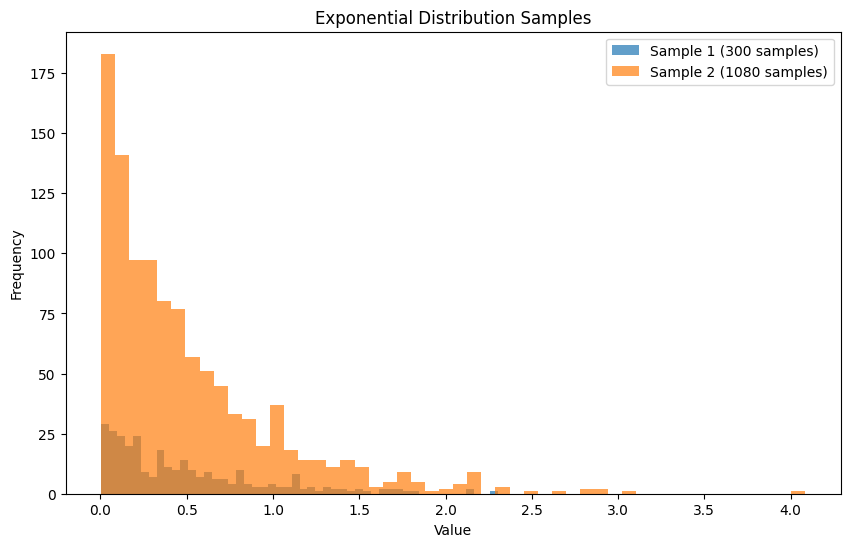

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(exp_sample1, bins=50, alpha=0.7, label='Sample 1 ({} samples)'.format(V1))
plt.hist(exp_sample2, bins=50, alpha=0.7, label='Sample 2 ({} samples)'.format(V2))

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Exponential Distribution Samples')
plt.legend()

plt.show()

# 2. Получение выборок объема V1/n и V2/n методом суммирования.

Для преобразования распределения в нормальное можно использовать метод суммирования опираясь на центральную предельную теорему:

In [ ]:
def sum_normal(sample, n):
    k = len(sample) // n
    normal_samples = []
    for i in range(k):
        chunk = sample[i*n:(i+1)*n]
        Yn = (np.sum(chunk) - n / lambda_exp) / np.sqrt(n / lambda_exp**2)
        X = Yn * sigma + m
        normal_samples.append(X)
    return normal_samples

In [ ]:
sampleV1 = sum_normal(exp_sample1, 12)
sampleV2 = sum_normal(exp_sample2, 12)

sampleV1 = [sigma * number + m for number in sampleV1]
sampleV2 = [sigma * number + m for number in sampleV2]

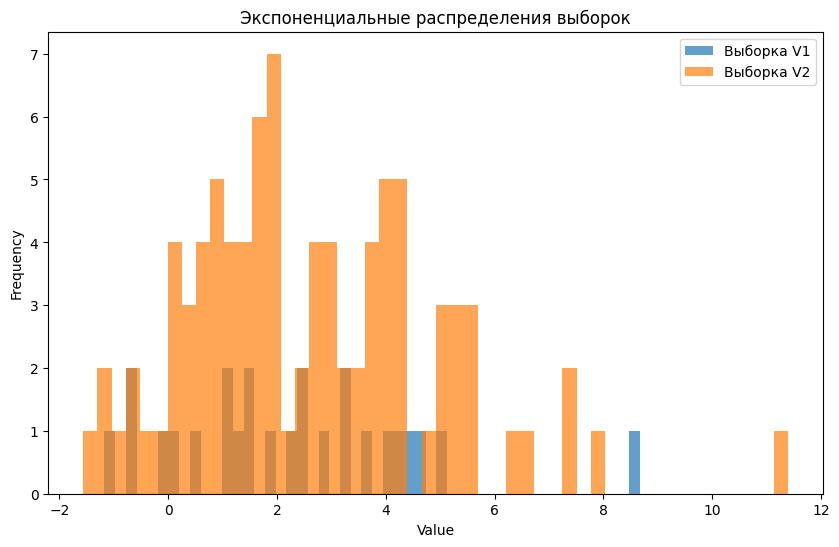

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(sampleV1, bins=50, alpha=0.7, label='Выборка V1')
plt.hist(sampleV2, bins=50, alpha=0.7, label='Выборка V2')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Экспоненциальные распределения выборок')
plt.legend()

plt.show()

# 3. Вычисление выборочных оценок и сравнение с теоретическими значениями:

*   Среднего
*   Дисперсии
*   Коэффициента асимметрии
*   Эксцесса





In [ ]:
def sample_statistics(sample):
    mean = np.mean(sample)
    var = np.var(sample)
    skewness = skew(sample)
    kurt = kurtosis(sample)
    return mean, var, skewness, kurt

norm_sample1 = sum_normal(exp_sample1, n)
norm_sample2 = sum_normal(exp_sample2, n)

stats1 = sample_statistics(norm_sample1)
stats_gl1 = sample_statistics(exp_sample1)
stats2 = sample_statistics(norm_sample2)
stats_gl2 = sample_statistics(exp_sample2)



print("Sample 1 Stats: Mean={}, Variance={}, Skewness={}, Kurtosis={}".format(*stats1))
print("Global 1 Stats: Mean={}, Variance={}, Skewness={}, Kurtosis={}".format(*stats_gl1))
print("Sample 2 Stats: Mean={}, Variance={}, Skewness={}, Kurtosis={}".format(*stats2))
print("Gloabal 2 Stats: Mean={}, Variance={}, Skewness={}, Kurtosis={}".format(*stats_gl2))

Sample 1 Stats: Mean=0.8586236662978949, Variance=2.103209575034443, Skewness=0.7323420678735679, Kurtosis=0.8729828293199295
Global 1 Stats: Mean=0.4863960559466745, Variance=0.21001394840083293, Skewness=1.3573224990579633, Kurtosis=1.586687690285113
Sample 2 Stats: Mean=1.0740221042008067, Variance=2.2953463078860485, Skewness=0.7994895225755361, Kurtosis=1.2448018172777147
Gloabal 2 Stats: Mean=0.5071227802977196, Variance=0.2630902450160957, Skewness=1.9225838109229305, Kurtosis=5.205274677706843


In [ ]:
len(norm_sample2)

90

# 4. Визуализация

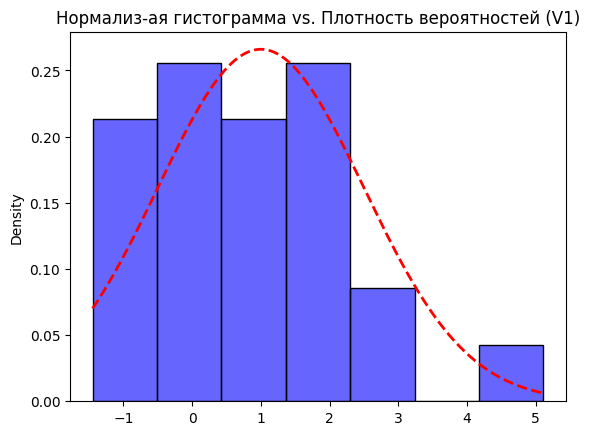

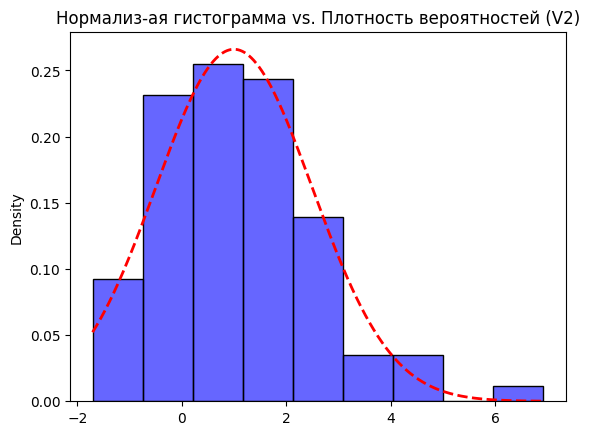

In [ ]:
def plot_distribution(sample, title):
    sns.histplot(sample, stat="density", alpha=0.6, color='blue', line_kws={'linewidth': 2}, binwidth=1) #binwidth пофиксить
    x = np.linspace(min(sample), max(sample), 1000)
    plt.plot(x, norm.pdf(x, m, sigma), 'r--', linewidth=2)
    plt.title(title)
    plt.show()

plot_distribution(norm_sample1, "Нормализ-ая гистограмма vs. Плотность вероятностей (V1)")
plot_distribution(norm_sample2, "Нормализ-ая гистограмма vs. Плотность вероятностей (V2)")

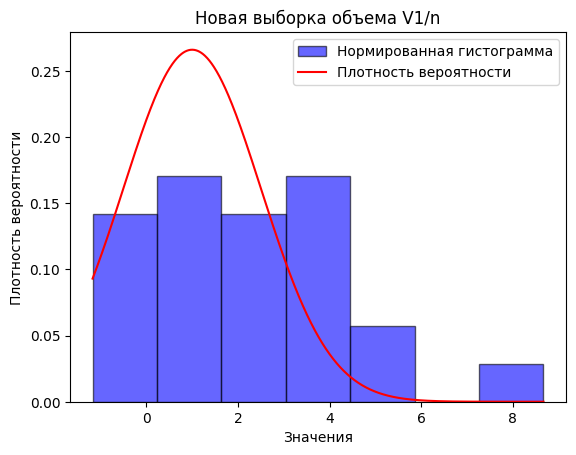

In [ ]:

plt.hist(sampleV1, bins=7, density=True, alpha=0.6, color='blue', edgecolor='black', label='Нормированная гистограмма')

x = np.linspace(np.min(sampleV1), np.max(sampleV1), 1000)
y = norm.pdf(x, m, sigma)


plt.plot(x, y, label='Плотность вероятности', color='red')
plt.xlabel("Значения")
plt.ylabel("Плотность вероятности")
plt.title("Новая выборка объема V1/n")
plt.legend()
plt.show()


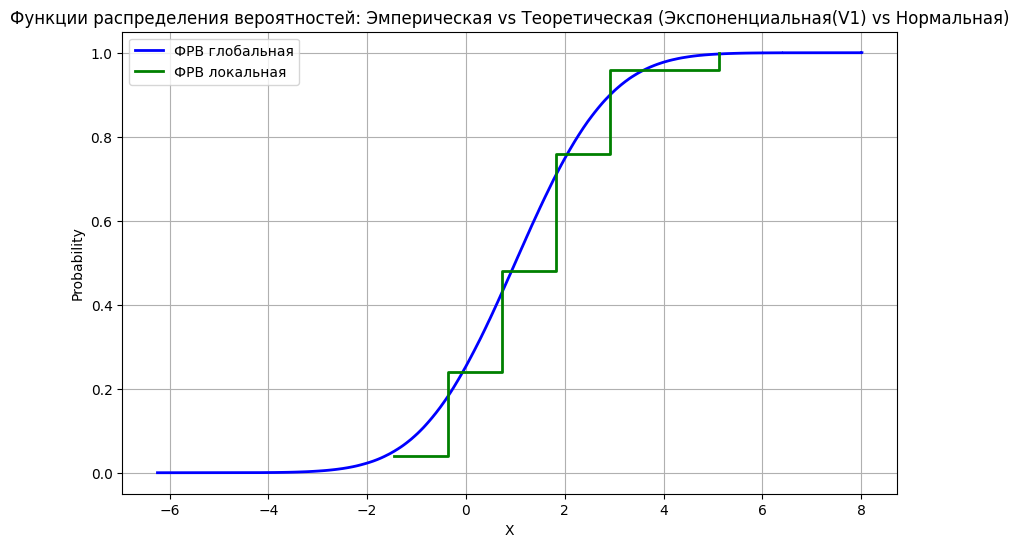

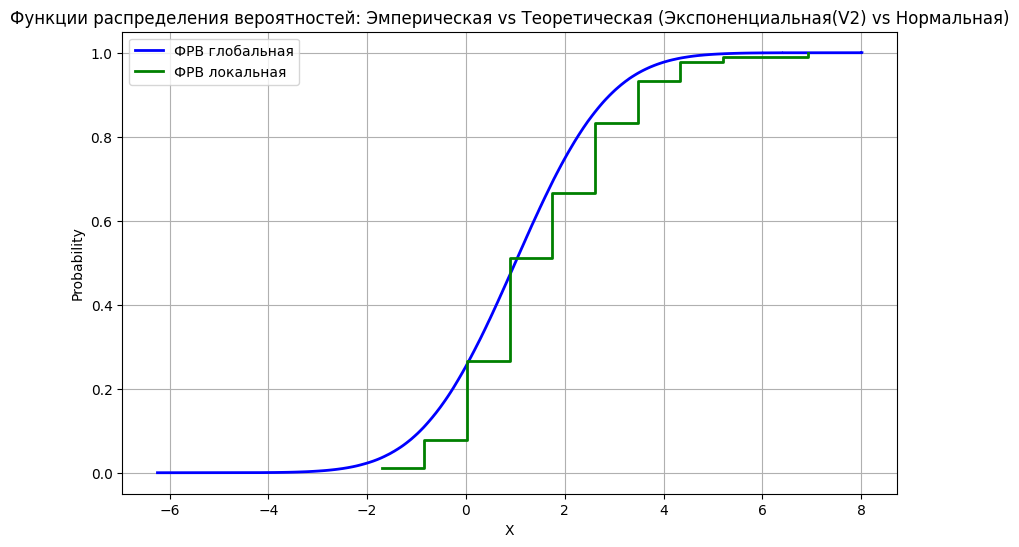

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from statsmodels.distributions.empirical_distribution import ECDF

def plot_ecdf_vs_cdf(sample_global, sample_local, title):
    ecdf_global = ECDF(sample_global)
    x_global = np.sort(sample_global)
    y_ecdf_global = ecdf_global(x_global)


    bin_edges = np.histogram_bin_edges(sample_local, bins='fd')
    ecdf_local = ECDF(sample_local)
    y_ecdf_local = ecdf_local(bin_edges)

    plt.figure(figsize=(10, 6))
    plt.step(x_global, y_ecdf_global, label='ФРВ глобальная', color='blue', where='post', linewidth=2)
    plt.step(bin_edges, y_ecdf_local, label='ФРВ локальная', color='green', where='post', linewidth=2) #check step
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_ecdf_vs_cdf(normal_distr, norm_sample1, "Функции распределения вероятностей: Эмперическая vs Теоретическая (Экспоненциальная(V1) vs Нормальная)")
plot_ecdf_vs_cdf(normal_distr, norm_sample2, "Функции распределения вероятностей: Эмперическая vs Теоретическая (Экспоненциальная(V2) vs Нормальная)")

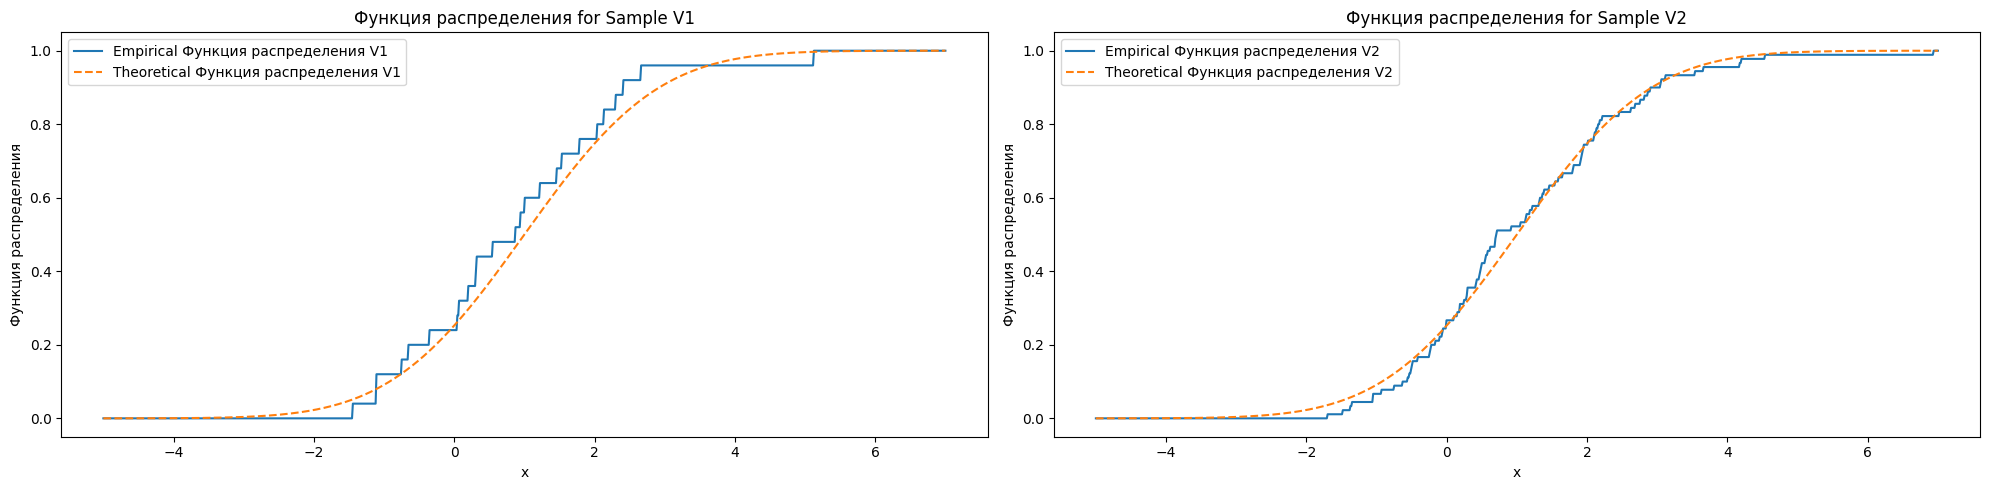

In [ ]:
def empirical_cdf(sample, x):
    """
    Вычисляет эмпирическую функцию распределения (ECDF) для выборки sample в точках x.

    :param sample: Выборка данных.
    :param x: Точки, в которых нужно вычислить ECDF.
    :return: Значения эмпирической функции распределения в точках x.
    """
    sample_sorted = np.sort(sample)
    return np.searchsorted(sample_sorted, x, side='right') / len(sample)

# Создание x-значений для теоретической CDF
x = np.linspace(m - 4*sigma, m + 4*sigma, 1000)

# Эмпирическая и теоретическая CDF для выборки V1
ecdf_V1 = empirical_cdf(norm_sample1, x)
tcdf_V1 = norm.cdf(x, loc=m, scale=sigma)

# Эмпирическая и теоретическая CDF для выборки V2
ecdf_V2 = empirical_cdf(norm_sample2, x)
tcdf_V2 = norm.cdf(x, loc=m, scale=sigma)

# График CDF для выборок V1 и V2
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(x, ecdf_V1, label='Empirical Функция распределения V1')
plt.plot(x, tcdf_V1, label='Theoretical Функция распределения V1', linestyle='--')
plt.title('Функция распределения for Sample V1')
plt.xlabel('x')
plt.ylabel('Функция распределения')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, ecdf_V2, label='Empirical Функция распределения V2')
plt.plot(x, tcdf_V2, label='Theoretical Функция распределения V2', linestyle='--')
plt.title('Функция распределения for Sample V2')
plt.xlabel('x')
plt.ylabel('Функция распределения')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Выводы

Графический анализ показывает, что наблюдения из выборки близки к теоретическому нормальному распределению. На основе эмпирических и теоретических функций распределения можно сделать вывод, что данные хорошо соответствуют ожидаемому нормальному распределению. Кроме того, нормированные гистограммы выборок V1/n и V2/n демонстрируют согласованность с плотностью вероятностей нормального распределения, что подтверждает наше предположение о том, что данные имеют характеристики нормального распределения. Также можно убедиться, что при большей выборке значения распределений ближе к эталоной.





